In [15]:
import pandas as pd
import plotly.express as px

# Carregar os arquivos CSV
contratos_est_mun_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', sep=';')
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias_est_mun = ['Repasse previsto', 'Valor Contrapartida']
colunas_monetarias_contrato = ['Liquidado - Orçamento', 'Estornado - Orçamento', 'Liquidado - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
contratos_est_mun_df[colunas_monetarias_est_mun] = contratos_est_mun_df[colunas_monetarias_est_mun].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)
contrato_pag_df[colunas_monetarias_contrato] = contrato_pag_df[colunas_monetarias_contrato].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Calcular o total de investimento em cada entidade
total_investimento = contratos_est_mun_df.groupby('Beneficiario')['Repasse previsto'].sum().reset_index()

# 3. Visualização Gráfica com Plotly Express
fig = px.bar(total_investimento, x='Repasse previsto', y='Beneficiario', orientation='h', title='Total de Investimento por Entidade')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Total de Investimento (R$)', yaxis_title='Beneficiario', height=500, width=800)
fig.show()

In [16]:
total_repasse_previsto = contratos_est_mun_df['Repasse previsto'].sum()
total_valor_contrapartida = contratos_est_mun_df['Valor Contrapartida'].sum()

print(f'Total Repasse Previsto: R${total_repasse_previsto:,.2f}')
print(f'Total Valor Contrapartida: R${total_valor_contrapartida:,.2f}')

Total Repasse Previsto: R$120,079,878.62
Total Valor Contrapartida: R$24,905,470.10


In [17]:
import pandas as pd

# Carregar os arquivos CSV
contratos_est_mun_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', sep=';')
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias_est_mun = ['Repasse previsto', 'Valor Contrapartida']
colunas_monetarias_contrato = ['Liquidado - Orçamento', 'Estornado - Orçamento', 'Liquidado - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
contratos_est_mun_df[colunas_monetarias_est_mun] = contratos_est_mun_df[colunas_monetarias_est_mun].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)
contrato_pag_df[colunas_monetarias_contrato] = contrato_pag_df[colunas_monetarias_contrato].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Calcular as somas dos investimentos
total_estimado = contratos_est_mun_df['Repasse previsto'].sum() + contratos_est_mun_df['Valor Contrapartida'].sum()
total_contrato = contrato_pag_df['Líquido'].sum()

# 3. Calcular as porcentagens
porcentagem_investido_direto_prefeitura = (total_contrato / total_estimado) * 100
porcentagem_investido_atraves_estado = ((total_contrato - contrato_pag_df['Estornado - Restos a pagar'].sum()) / total_estimado) * 100

# 4. Ajustar as porcentagens para totalizar 100%
ajuste = 100 / (porcentagem_investido_direto_prefeitura + porcentagem_investido_atraves_estado)
porcentagem_investido_direto_prefeitura *= ajuste
porcentagem_investido_atraves_estado *= ajuste

# 5. Exibir os resultados ajustados
print(f"A Prefeitura investiu diretamente {porcentagem_investido_direto_prefeitura:.2f}% do total estimado.")
print(f"A Prefeitura investiu através do estado {porcentagem_investido_atraves_estado:.2f}% do total estimado.")

A Prefeitura investiu diretamente 50.16% do total estimado.
A Prefeitura investiu através do estado 49.84% do total estimado.


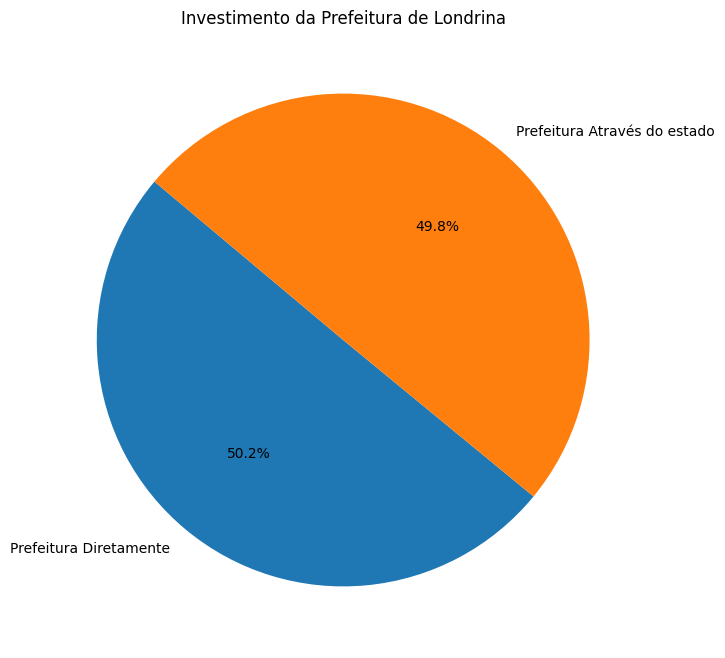

In [18]:
import matplotlib.pyplot as plt

# Dados
labels = ['Prefeitura Diretamente', 'Prefeitura Através do estado']
valores = [50.16, 49.84]  # Porcentagens

# Cores para as fatias
cores = ['#1f77b4', '#ff7f0e']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=cores, startangle=140)

# Adicionando título
plt.title('Investimento da Prefeitura de Londrina')

# Exibindo o gráfico
plt.show()